<a href="https://colab.research.google.com/github/abeni-hub/Apex_back/blob/main/Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


Creating A Convent

the problem we will consider is classifiying 10 different everyday objects.
CIFAR Image Dataset

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

170498071/170498071 [==============================] - 11s 0us/step


The labels in the dataset are the following:
Airplane
Automobile
Bird
Cat
Deer
Dog
Frog
Horse
Ship
Truck

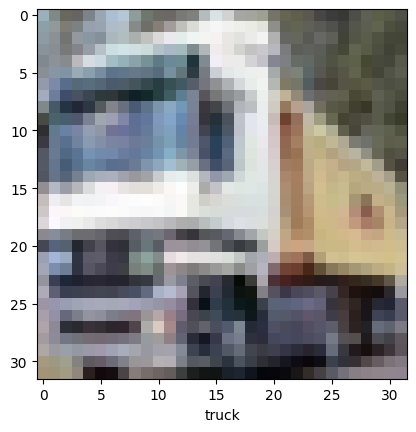

In [ ]:
IMG_INDEX = 1 # change this to look at other images

plt.imshow(train_images[IMG_INDEX], cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

**`*CNN Architecture*`**

A common architecture for a CNN is a stack of Conv2D and Maxpooling2D layers followed by a few denesly connected layers.To idea is that the stack of convulational and maxPooling layers extract the features from the image.
Then these features are flattened and fed to densly connected layers that the determine the class of an image based on the presence of features.

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model.summary() # let's have a look at our model so far

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 56320 

***Adding Dense Layers***

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

we can see that the flatten layer changes the shape of our data so that we can feed it to the 64 node dense layer, followed by the final output layer of 10 neurons(one for each class).

# ***Training***

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 77s 48ms/step - loss: 1.5105 - accuracy: 0.4492 - val_loss: 1.2569 - val_accuracy: 0.5458
Epoch 2/10
1563/1563 [==============================] - 79s 50ms/step - loss: 1.1500 - accuracy: 0.5911 - val_loss: 1.1067 - val_accuracy: 0.6111
Epoch 3/10
1563/1563 [==============================] - 86s 55ms/step - loss: 1.0033 - accuracy: 0.6451 - val_loss: 0.9904 - val_accuracy: 0.6537
Epoch 4/10
1563/1563 [==============================] - 76s 49ms/step - loss: 0.9011 - accuracy: 0.6849 - val_loss: 0.9162 - val_accuracy: 0.6859
Epoch 5/10
1563/1563 [==============================] - 76s 49ms/step - loss: 0.8307 - accuracy: 0.7066 - val_loss: 0.8953 - val_accuracy: 0.6929
Epoch 6/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.7761 - accuracy: 0.7283 - val_loss: 0.9240 - val_accuracy: 0.6866
Epoch 7/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.7201 - accuracy: 0.7474 - val_loss: 0.9419 -

# ***Evaluating the model***

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print(test_acc)

313/313 - 4s - loss: 0.9396 - accuracy: 0.6973 - 4s/epoch - 13ms/step
0.6973000168800354


**Working with Small Datasets**

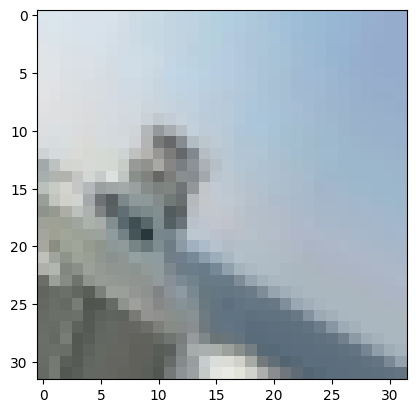

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

#create a data generator object that transforms image
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
#pick an image to transform
test_img = train_images[100]
img = image.img_to_array(test_img) # convert image to numpy array
img = img.reshape((1,) + img.shape) # reshape image

i = 0
for batch in datagen.flow(img, save_prefix='test', save_format='jpeg'):
  plt.figure(1)
  plot = plt.imshow(image.img_to_array(batch[0]))
  i += 1
  if i > 20:
      break
plt.show()